In [120]:

import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.3f' % x)
plt.style.use('dark_background')

In [64]:
# данные с kaggle.com c 2012-01-01 по 2020-04-22
dt = pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2020-04-22.csv')
dt.index = dt['Timestamp'].apply(lambda x: datetime.datetime.fromtimestamp(x))
del dt['Timestamp']

In [65]:
# данные с http://api.bitcoincharts.com/v1/csv/bitstampUSD.csv.gz
# содержит данные по всем сделкам 

df = pd.read_csv('bitstampUSD.csv', names=['Timestamp', 'Prise','Volume_(BTC)'])
df['Timestamp'] = df['Timestamp'].apply(lambda x: datetime.datetime.fromtimestamp(x))

In [66]:
df

,Timestamp,Prise,Volume_(BTC)
0,2011-09-13 20:53:36,5.80,1.000000
1,2011-09-13 20:53:44,5.83,3.000000
2,2011-09-13 20:53:49,5.90,1.000000
3,2011-09-13 20:53:54,6.00,20.000000
4,2011-09-13 21:32:53,5.95,12.452100
...,...,...,...
41453674,2020-08-29 05:15:39,11482.13,0.089941
41453675,2020-08-29 05:15:40,11482.15,0.013101
41453676,2020-08-29 05:15:41,11476.83,0.005088
41453677,2020-08-29 05:15:41,11482.13,0.057399


In [67]:
# добавляем столбец Volume_(Currency)
#  + столбец с округленными значениями минут 

df['Volume_(Currency)'] = df['Prise'] * df['Volume_(BTC)']
df['Timestamp_min'] = df.Timestamp.dt.floor('min')

In [68]:
# срез из данных начиная от последних данных из kaggle 
df_sl = df[df.Timestamp >= '2020-04-22 07:00:00'].copy()

In [69]:
# все время по минутам в срезе
all_time = pd.DataFrame(pd.date_range(df_sl.Timestamp.dt.floor('min').values[0], df_sl.Timestamp.dt.floor('min').values[-1], freq = 'min'), columns = ['Timestamp'])
all_time.index = all_time['Timestamp']
del all_time['Timestamp']
# создаем столбцы для итоговой таблицы с пустыми значениями
all_time[['Open', 'High', 'Low', 'Close', 'Volume_(BTC)', 'Volume_(Currency)', 'Weighted_Price']] = np.nan

In [70]:
# создаем из датафрейма с данными разовых сделок итоговый датафрейм, как в исходном датасете из kaggle
tmp_Price = []
tmp_Volume_BTC = []
tmp_Volume_Currency = []
tmp = df_sl.iloc[0,4]
cnt = df_sl.shape[0]

for i in df_sl.itertuples():
    
    # для отслеживания прогресса цикла
    if cnt % 1000 == 0:
        print(cnt) 
        
    if i[5] == tmp:
        tmp_Price.append(i[2])
        tmp_Volume_BTC.append(i[3])
        tmp_Volume_Currency.append(i[4])
        cnt -=1
        tmp = i[5]
        continue
 
    all_time.loc[tmp,'Open'] = tmp_Price[0] 
    all_time.loc[tmp,'High'] = max(tmp_Price)
    all_time.loc[tmp,'Low'] = min(tmp_Price) 
    all_time.loc[tmp,'Close'] = tmp_Price[-1] 
    all_time.loc[tmp,'Volume_(BTC)'] = sum(tmp_Volume_BTC) 
    all_time.loc[tmp,'Volume_(Currency)'] = sum(tmp_Volume_Currency) 
    all_time.loc[tmp,'Weighted_Price'] = sum(tmp_Volume_Currency) / sum(tmp_Volume_BTC) 
               
    tmp_Price = []
    tmp_Volume_BTC = []
    tmp_Volume_Currency = []
    
    tmp_Price.append(i[2])
    tmp_Volume_BTC.append(i[3])
    tmp_Volume_Currency.append(i[4])

    cnt -=1
    tmp = i[5]

all_time.loc[tmp,'Open'] = tmp_Price[0] 
all_time.loc[tmp,'High'] = max(tmp_Price)
all_time.loc[tmp,'Low'] = min(tmp_Price) 
all_time.loc[tmp,'Close'] = tmp_Price[-1] 
all_time.loc[tmp,'Volume_(BTC)'] = sum(tmp_Volume_BTC) 
all_time.loc[tmp,'Volume_(Currency)'] = sum(tmp_Volume_Currency) 
all_time.loc[tmp,'Weighted_Price'] = sum(tmp_Volume_Currency) / sum(tmp_Volume_BTC) 

2889000
2888000
2887000
2886000
2885000
2884000
2883000
2882000
2881000
2880000
2879000
2878000
2877000
2876000
2875000
2874000
2873000
2872000
2871000
2870000
2869000
2868000
2867000
2866000
2865000
2864000
2863000
2862000
2861000
2860000
2859000
2858000
2857000
2856000
2855000
2854000
2853000
2852000
2851000
2850000
2849000
2848000
2847000
2846000
2845000
2844000
2843000
2842000
2841000
2840000
2839000
2838000
2837000
2836000
2835000
2834000
2833000
2832000
2831000
2830000
2829000
2828000
2827000
2826000
2825000
2824000
2823000
2822000
2821000
2820000
2819000
2818000
2817000
2816000
2815000
2814000
2813000
2812000
2811000
2810000
2809000
2808000
2807000
2806000
2805000
2804000
2803000
2802000
2801000
2800000
2799000
2798000
2797000
2796000
2795000
2794000
2793000
2792000
2791000
2790000
2789000
2788000
2787000
2786000
2785000
2784000
2783000
2782000
2781000
2780000
2779000
2778000
2777000
2776000
2775000
2774000
2773000
2772000
2771000
2770000
2769000
2768000
2767000
2766000
2765000


1862000
1861000
1860000
1859000
1858000
1857000
1856000
1855000
1854000
1853000
1852000
1851000
1850000
1849000
1848000
1847000
1846000
1845000
1844000
1843000
1842000
1841000
1840000
1839000
1838000
1837000
1836000
1835000
1834000
1833000
1832000
1831000
1830000
1829000
1828000
1827000
1826000
1825000
1824000
1823000
1822000
1821000
1820000
1819000
1818000
1817000
1816000
1815000
1814000
1813000
1812000
1811000
1810000
1809000
1808000
1807000
1806000
1805000
1804000
1803000
1802000
1801000
1800000
1799000
1798000
1797000
1796000
1795000
1794000
1793000
1792000
1791000
1790000
1789000
1788000
1787000
1786000
1785000
1784000
1783000
1782000
1781000
1780000
1779000
1778000
1777000
1776000
1775000
1774000
1773000
1772000
1771000
1770000
1769000
1768000
1767000
1766000
1765000
1764000
1763000
1762000
1761000
1760000
1759000
1758000
1757000
1756000
1755000
1754000
1753000
1752000
1751000
1750000
1749000
1748000
1747000
1746000
1745000
1744000
1743000
1742000
1741000
1740000
1739000
1738000


811000
810000
809000
808000
807000
806000
805000
804000
803000
802000
801000
800000
799000
798000
797000
796000
795000
794000
793000
792000
791000
790000
789000
788000
787000
786000
785000
784000
783000
782000
781000
780000
779000
778000
777000
776000
775000
774000
773000
772000
771000
770000
769000
768000
767000
766000
765000
764000
763000
762000
761000
760000
759000
758000
757000
756000
755000
754000
753000
752000
751000
750000
749000
748000
747000
746000
745000
744000
743000
742000
741000
740000
739000
738000
737000
736000
735000
734000
733000
732000
731000
730000
729000
728000
727000
726000
725000
724000
723000
722000
721000
720000
719000
718000
717000
716000
715000
714000
713000
712000
711000
710000
709000
708000
707000
706000
705000
704000
703000
702000
701000
700000
699000
698000
697000
696000
695000
694000
693000
692000
691000
690000
689000
688000
687000
686000
685000
684000
683000
682000
681000
680000
679000
678000
677000
676000
675000
674000
673000
672000
671000
670000
669000

In [71]:
all_time

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2020-04-22 07:00:00,6850.60,6850.60,6850.60,6850.60,0.014436,98.896906,6850.600000
2020-04-22 07:01:00,6840.44,6853.65,6840.44,6853.65,0.376899,2580.591402,6846.902895
2020-04-22 07:02:00,6853.65,6858.43,6853.65,6858.43,0.083134,570.079943,6857.334910
2020-04-22 07:03:00,6859.09,6860.68,6854.98,6860.68,0.041590,285.282514,6859.370309
2020-04-22 07:04:00,6860.01,6861.66,6860.01,6861.54,2.330433,15989.335284,6861.100966
...,...,...,...,...,...,...,...
2020-08-29 05:11:00,11484.31,11493.65,11484.31,11493.65,0.575212,6610.150560,11491.678884
2020-08-29 05:12:00,11493.63,11493.64,11481.00,11481.00,0.149960,1722.708319,11487.809284
2020-08-29 05:13:00,11485.68,11485.68,11474.83,11485.27,3.038474,34888.520059,11482.249742


In [72]:
all_btc = pd.concat([dt, all_time])

In [73]:
all_btc

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31 14:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
2011-12-31 14:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 14:54:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 14:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 14:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2020-08-29 05:11:00,11484.31,11493.65,11484.31,11493.65,0.575212,6610.150560,11491.678884
2020-08-29 05:12:00,11493.63,11493.64,11481.00,11481.00,0.149960,1722.708319,11487.809284
2020-08-29 05:13:00,11485.68,11485.68,11474.83,11485.27,3.038474,34888.520059,11482.249742


### загружаем данные доллар - рубль

In [74]:
usd_rub = pd.read_csv('USDRUB_' + str(11) + '0101_' + str(11) + '1231.csv')

for year in range(12, 20):
    table = pd.read_csv('USDRUB_' + str(year) + '0101_' + str(year) + '1231.csv')
    usd_rub = pd.concat([usd_rub, table])
    
table = pd.read_csv('USDRUB_200101_200830.csv')
usd_rub = pd.concat([usd_rub, table])


In [75]:
usd_rub['<DATE>'] = usd_rub['<DATE>'].astype(str)
usd_rub['<TIME>'] = usd_rub['<TIME>'].astype(str)

def create_time(s):
    s = '0'*(6-len(s)) + s
    s = ' ' + s[:2] + ':' + s[2:4] + ':' + s[4:]
    return s

def create_date(s):
    s = s[:4] + '-' + s[4:6] + '-' + s[6:]
    return s

usd_rub['<TIME>'] = usd_rub['<TIME>'].apply(create_time)
usd_rub['<DATE>'] = usd_rub['<DATE>'].apply(create_date)


usd_rub['<DATETIME>'] = usd_rub['<DATE>'] + usd_rub['<TIME>']
usd_rub.index = usd_rub['<DATETIME>'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))


In [76]:
usd_rub.drop_duplicates(inplace=True)
usd_rub = usd_rub['<CLOSE>']

In [77]:
all_dates = pd.DataFrame(columns=['N'],index=pd.date_range(start='1/1/2011', end='31/8/2020', freq='min'))

usd_rub = pd.concat([usd_rub, all_dates], axis=1)
del usd_rub['N']


In [78]:
usd_rub.rename(columns={'<CLOSE>':'USD_RUB'}, inplace=True)

In [79]:
usd_rub.fillna(method='ffill', inplace=True)
usd_rub.fillna(method='bfill', inplace=True)

### объеденение данных

In [80]:
btc = pd.concat([all_btc, usd_rub], axis=1, join='inner')

In [81]:
btc['RUB'] = btc['USD_RUB'] * btc['Weighted_Price']

## Задание 1

In [143]:
btc.dropna()


,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,USD_RUB,RUB
2011-12-31 14:52:00,4.390,4.390,4.390,4.390,0.456,2.000,4.390,32.120,141.007
2011-12-31 22:50:00,4.390,4.390,4.390,4.390,48.000,210.720,4.390,32.120,141.007
2011-12-31 23:59:00,4.500,4.570,4.500,4.570,37.862,171.380,4.526,32.120,145.388
2012-01-01 00:00:00,4.580,4.580,4.580,4.580,9.000,41.220,4.580,32.120,147.110
2012-01-01 11:16:00,4.580,4.580,4.580,4.580,1.502,6.879,4.580,32.120,147.110
...,...,...,...,...,...,...,...,...,...
2020-08-29 05:11:00,11484.310,11493.650,11484.310,11493.650,0.575,6610.151,11491.679,73.978,850131.420
2020-08-29 05:12:00,11493.630,11493.640,11481.000,11481.000,0.150,1722.708,11487.809,73.978,849845.155
2020-08-29 05:13:00,11485.680,11485.680,11474.830,11485.270,3.038,34888.520,11482.250,73.978,849433.871
2020-08-29 05:14:00,11485.170,11485.250,11476.840,11484.390,0.772,8867.394,11484.542,73.978,849603.428


In [121]:
btc.describe()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,USD_RUB,RUB
count,3307577.000,3307577.000,3307577.000,3307577.000,3307577.000,3307577.000,3307577.000,4549113.000,3307577.000
mean,4009.562,4012.364,4006.573,4009.516,9.643,30445.123,4009.509,53.299,254309.225
std,4080.468,4083.798,4076.850,4080.411,31.692,106516.264,4080.409,15.198,264002.649
min,3.800,3.800,1.500,1.500,0.000,0.000,3.800,28.840,115.064
25%,420.230,420.440,420.020,420.220,0.386,378.543,420.217,34.402,20191.244
50%,2289.660,2291.870,2286.510,2289.690,1.943,2889.702,2289.490,59.124,131074.911
75%,7507.370,7511.840,7502.110,7507.250,7.450,19109.463,7507.028,65.001,482291.055
max,19665.760,19666.000,19649.960,19665.750,5853.852,10445987.794,19663.299,85.816,1156612.938


In [135]:
btc.describe() - btc[:'2019-08-12 07:00:00'].describe()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,USD_RUB,RUB
count,541758.000,541758.000,541758.000,541758.000,541758.000,541758.000,541758.000,551416.000,541758.000
mean,949.903,950.337,949.551,949.878,-0.780,3577.003,950.010,2.037,68262.286
std,339.299,338.962,339.865,339.278,-2.058,10312.015,339.499,0.193,34836.010
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,45.960,45.920,46.020,45.970,-0.067,91.991,45.973,1.332,2703.175
50%,1510.210,1511.960,1507.500,1510.200,-0.157,679.736,1510.076,1.596,88518.446
75%,1871.625,1872.340,1871.010,1871.895,-0.730,3562.577,1871.910,0.691,138741.902
max,0.000,0.000,0.000,0.000,0.000,2876550.733,0.000,0.000,0.000


минимальные и максимальные значения не поменялись кроме максимального обьема сделки 

    (10445987.794 $ - новый максимум, на 2876550.733 $ ,болше предыдущего максимума за период до 2019-08-12 07:00:00 )

<AxesSubplot:>

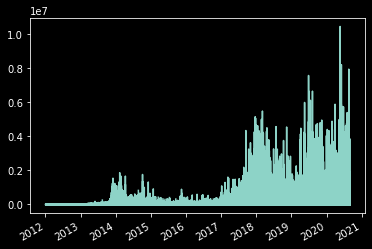

In [146]:
# объем сделок 
btc.loc[:,'Volume_(Currency)'].plot()

средняя цена в долларах возрасла на 950.010 $  в рублях на 68262.286

<AxesSubplot:>

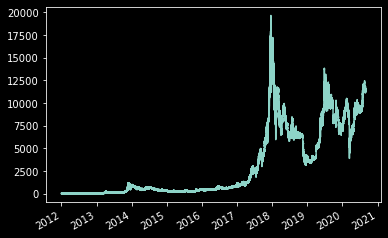

In [148]:
# средняя цена биткойна
btc.loc[:,'Weighted_Price'].plot()

#### зависимость приобретенного обьема от цены за этот обьем за все время

Text(0.5, 1.0, 'BTC-Currency Scatter Plot')

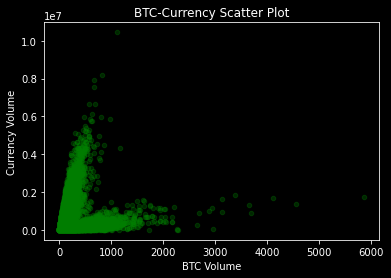

In [194]:
btc.plot(kind='scatter', x='Volume_(BTC)', y='Volume_(Currency)',alpha = 0.3, color = 'green')
plt.xlabel('BTC Volume')              # label = name of label
plt.ylabel('Currency Volume')
plt.title('BTC-Currency Scatter Plot')  

#### за отрезок от 2019-08-12 07:00:00 до настоящего времени

Text(0.5, 1.0, 'BTC-Currency Scatter Plot')

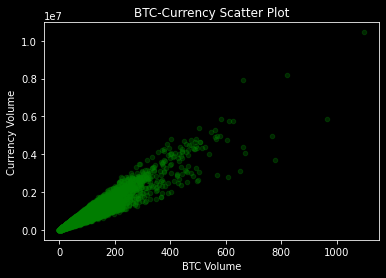

In [195]:
btc['2019-08-12 07:00:00':].plot(kind='scatter', x='Volume_(BTC)', y='Volume_(Currency)',alpha = 0.3, color = 'green')
plt.xlabel('BTC Volume')              # label = name of label
plt.ylabel('Currency Volume')
plt.title('BTC-Currency Scatter Plot')  

#### зависимость объемов продаж от цены биткоина:

Text(0.5, 1.0, 'зависимость объемов продаж от цены биткоина')

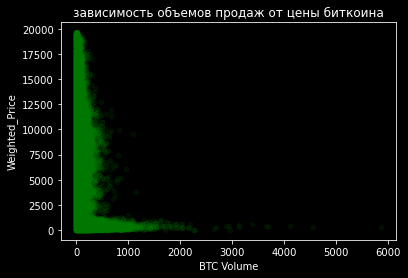

In [162]:
btc.plot(kind='scatter', x='Volume_(BTC)', y='Weighted_Price',alpha = 0.1, color = 'green')
plt.xlabel('BTC Volume')              # label = name of label
plt.ylabel('Weighted_Price')
plt.title('зависимость объемов продаж от цены биткоина') 

#### в каких объемах покупали биткоины по каким ценам.

2019-2020

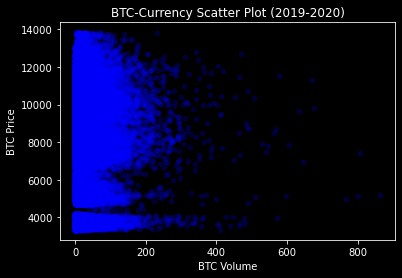

In [172]:
btc[(btc.index >= datetime.datetime(2019, 1, 1)) & (btc.index < datetime.datetime(2020, 1, 1))].plot(kind='scatter', x='Volume_(BTC)', y='Weighted_Price', alpha = 0.2, color = 'blue')
plt.xlabel('BTC Volume')              # label = name of label
plt.ylabel('BTC Price')
plt.title('BTC-Currency Scatter Plot (2019-2020)')  
plt.show()

2020 - ...

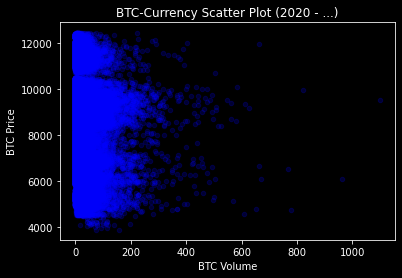

In [173]:
btc[(btc.index >= datetime.datetime(2020, 1, 1))].plot(kind='scatter', x='Volume_(BTC)', y='Weighted_Price', alpha = 0.2, color = 'blue')
plt.xlabel('BTC Volume')              # label = name of label
plt.ylabel('BTC Price')
plt.title('BTC-Currency Scatter Plot (2020 - ...)')  
plt.show()

#### А в каких годах люди покупали биткоин большими объемами?

<AxesSubplot:>

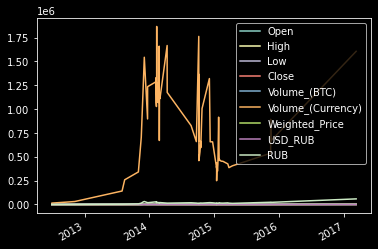

In [177]:
btc[all_btc['Volume_(BTC)']>1500].plot()

#### Гистограмма по ценам открытия:

<AxesSubplot:ylabel='Frequency'>

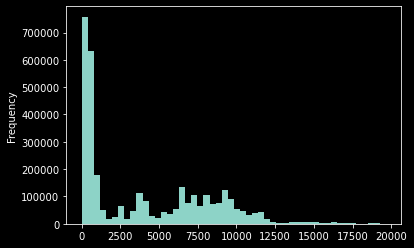

In [180]:
btc.Open.plot(kind='hist', bins=50)

<AxesSubplot:ylabel='Frequency'>

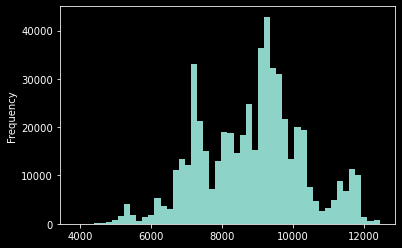

In [184]:
# за промжуток от 2019-08-12 до ....
btc[(btc.index >= datetime.datetime(2019, 8, 12))].Open.plot(kind='hist', bins=50)

#### Самая большая разница в цене в течение минуты:

<AxesSubplot:>

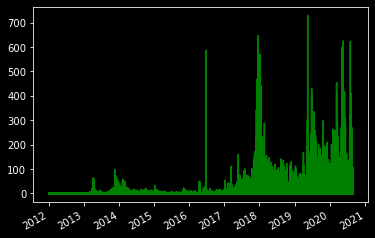

In [185]:
(btc.High - btc.Low).plot(color='green')

In [186]:
all_btc[(all_btc.High - all_btc.Low)>500]

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2016-06-23 19:36:00,586.800,588.530,1.500,1.500,54.486,29003.437,532.309
2017-12-19 18:47:00,17631.000,18277.070,17629.880,17685.700,51.164,913907.910,17862.457
2017-12-20 15:40:00,16939.410,17500.000,16928.860,17500.000,229.341,3936342.558,17163.705
2017-12-20 15:41:00,17500.040,17501.660,16985.880,17484.680,141.317,2467361.890,17459.720
2017-12-20 15:42:00,17484.680,17484.680,16967.210,17079.440,62.609,1069949.925,17089.312
2018-01-08 16:03:00,15420.000,15989.000,15420.000,15989.000,189.708,2980282.245,15709.820
2019-05-17 10:10:00,6250.000,6907.010,6178.000,6907.010,150.971,940847.083,6231.966
2019-05-17 10:12:00,6810.000,7320.610,6666.000,6775.340,155.564,1077596.221,6927.025
2020-05-10 07:22:00,8299.980,8850.000,8250.000,8559.990,431.531,3663062.769,8488.533


резкие перепады в последние полгода

#### зависимость цены доллара от стоимости биткоина:

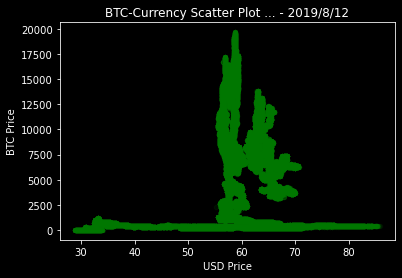

In [192]:
btc[(btc.index < datetime.datetime(2019, 8, 12))].plot(kind='scatter', x='USD_RUB', y='Weighted_Price', alpha = 0.1, color = 'green')
plt.xlabel('USD Price')              # label = name of label
plt.ylabel('BTC Price')
plt.title('BTC-Currency Scatter Plot ... - 2019/8/12')  
plt.show()

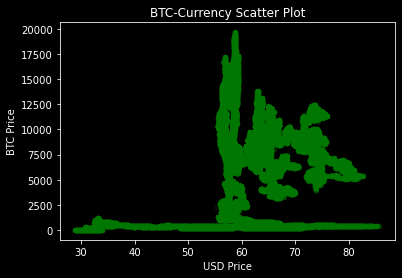

In [193]:
btc.plot(kind='scatter', x='USD_RUB', y='Weighted_Price', alpha = 0.1, color = 'green')
plt.xlabel('USD Price')              # label = name of label
plt.ylabel('BTC Price')
plt.title('BTC-Currency Scatter Plot')  
plt.show()

In [ ]:
изменилось отношение доллар-рубль, поэтому распределение сдвинулось в право по оси х

## Задание 2

In [149]:
usd_max = btc[btc.USD_RUB == btc.USD_RUB.max()]

In [84]:
usd_max

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,USD_RUB,RUB
2016-01-21 15:08:00,411.59,411.59,411.29,411.29,2.571583,1057.858409,411.364704,85.8156,35301.508873


In [85]:
print('Стоимость bitcoin когда цена доллара была максимальная: \n{}$ или {} руб.'.format(usd_max.loc[:,'Weighted_Price'][0], usd_max.loc[:,'RUB'][0]))

Стоимость bitcoin когда цена доллара была максимальная: 
411.36470377$ или 35301.50887284482 руб.


## Задание 3

<AxesSubplot:>

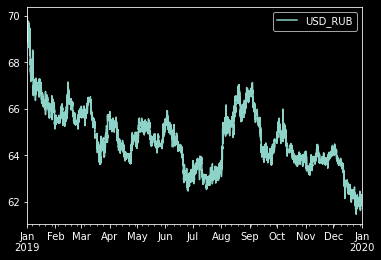

In [86]:
pd.DataFrame(btc.loc['2019-01-01 00:00:00':'2020-01-01 00:00:00','USD_RUB']).plot()

## Задание 4

<AxesSubplot:>

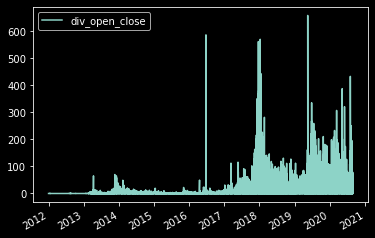

In [114]:
pd.DataFrame(abs(btc.loc[:,'Open']-btc.loc[:,'Close']), columns = ['div_open_close']).dropna().plot()

In [116]:
abs_div = abs(btc.loc[:,'Open']-btc.loc[:,'Close'])
btc[abs_div == abs_div.max()]

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,USD_RUB,RUB
2019-05-17 10:10:00,6250.0,6907.01,6178.0,6907.01,150.971151,940847.08342,6231.966042,64.6752,403053.65016
